#                               EDA for  NYC Taxi trip duration 

### Variable Identification, Range of Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')
data.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100


In [3]:
# Checking number of rows and columns
data.shape

(729322, 11)

In [4]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
# Checking for missing values
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### INT Data type

In [7]:
data.select_dtypes('int64').head(5)

,vendor_id,passenger_count,trip_duration
0,2,1,400
1,1,2,1100
2,2,2,1635
3,2,6,1141
4,1,1,848


#### Float data type

In [8]:
data.select_dtypes('float64').head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.953918,40.778873,-73.963875,40.771164
1,-73.988312,40.731743,-73.994751,40.694931
2,-73.997314,40.721458,-73.948029,40.774918
3,-73.961670,40.759720,-73.956779,40.780628
4,-74.017120,40.708469,-73.988182,40.740631


In [9]:
# since there are only two vendors this can be comsidered as a category
data.vendor_id = data.vendor_id.astype('category')

#### Object data type

In [10]:
data.select_dtypes('object').head(5)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,id1080784,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,id0889885,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,id0857912,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,id3744273,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,id0232939,2016-02-17 06:42:23,2016-02-17 06:56:31,N


In [11]:
# pickup_datetime and dropoff_datetime 
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data.dropoff_datetime = pd.to_datetime(data.dropoff_datetime)

In [12]:
# store_and_fwd_flag is a category data type
data.store_and_fwd_flag = data.store_and_fwd_flag.astype('category')

In [13]:
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [14]:
# adding an additional column called trip_duration_in_hrs 
data['trip_duration_in_hrs'] = (data.trip_duration/(60*60)).round(2)

# Univariate Analysis

In [15]:
data.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_in_hrs
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,0.264504
std,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.073519
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,0.110000
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,0.180000
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,0.300000
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,538.820000


In [16]:
numerical_columns = data.select_dtypes(include = ['int','float']).columns

In [17]:
data[numerical_columns].min()

passenger_count           0.000000
pickup_longitude       -121.933342
pickup_latitude          34.712234
dropoff_longitude      -121.933304
dropoff_latitude         32.181141
trip_duration             1.000000
trip_duration_in_hrs      0.000000
dtype: float64

In [18]:
data[numerical_columns].max()

passenger_count         9.000000e+00
pickup_longitude       -6.589738e+01
pickup_latitude         5.188108e+01
dropoff_longitude      -6.589738e+01
dropoff_latitude        4.392103e+01
trip_duration           1.939736e+06
trip_duration_in_hrs    5.388200e+02
dtype: float64

In [19]:
for col in numerical_columns:
    print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",data[col].min(), ", ",data[col].max(),"]"))

range of passenger_count: [0, 9]
range of pickup_longitude: [-121.93334197998048, -65.89738464355469]
range of pickup_latitude: [34.71223449707032, 51.88108444213867]
range of dropoff_longitude: [-121.9333038330078, -65.89738464355469]
range of dropoff_latitude: [32.1811408996582, 43.92102813720703]
range of trip_duration: [1, 1939736]
range of trip_duration_in_hrs: [0.0, 538.82]


## Summary of the dataset
###  * Numerical Variables are 
pickup_datetime,          
dropoff_datetime,         
passenger_count,           
pickup_longitude,        
pickup_latitude,         
dropoff_longitude,      
dropoff_latitude,       
trip_duration,             
trip_duration_in_hrs.          
### * Categorical Variables are 
Vendor_id,
store_and_fwd_flag.
### 1) Vendors
There are two vendors namely Vendor 1 and Vendor 2

Vendor 2 has the highest number of trips
### 2) Passengers

The minimum passenger count is 0 and maximum is 9
### 3) Trip Duration

The Mimimum trip duration is 0 and maximum is 538.82 hours

The mean trip duration is 0.26 hours which is 16 minutes

There are a lot of outliers in trip duration


## Univariate analysis -  Numerical

In [20]:
# Splitting the datatype into different types based on the datatype
numeric_datetime = ['pickup_datetime','dropoff_datetime']
numeric_passenger = ['passenger_count','trip_duration_in_hrs']
numeric_lat_lon = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
cat = ['Vendor_id', 'store_and_fwd_flag']

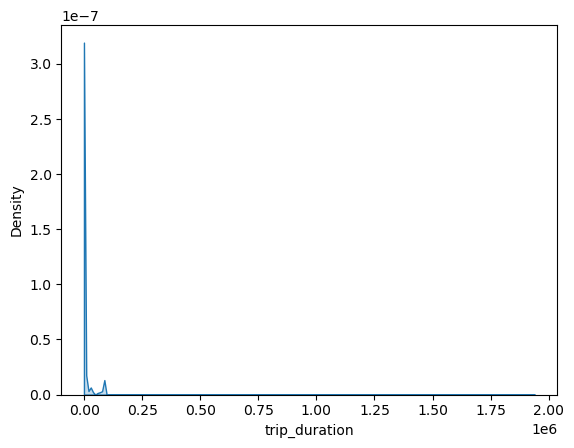

In [21]:
sns.kdeplot(data.trip_duration,fill = True);

In [22]:
#Trip_duration has a lot of outliers

In [23]:
# Adjusting the outlier for a better graph

Q1 = data.trip_duration_in_hrs.quantile(0.25)
Q3 = data.trip_duration_in_hrs.quantile(0.75)
IQR = Q3 - Q1
whis_low = abs(Q1 - 1.5*IQR)
whis_high =1.5*IQR +Q3

data.trip_duration_in_hrs.loc[data.trip_duration_in_hrs < whis_low] = whis_low
data.trip_duration_in_hrs.loc[data.trip_duration_in_hrs > whis_high] = whis_high

C:\Users\Sujay\AppData\Local\Temp\ipykernel_1740\2701973936.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.trip_duration_in_hrs.loc[data.trip_duration_in_hrs < whis_low] = whis_low
C:\Users\Sujay\AppData\Local\Temp\ipykernel_1740\2701973936.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.trip_duration_in_hrs.loc[data.trip_duration_in_hrs > whis_high] = whis_high


In [24]:
# Function for Univariate analysis of Datetime

def uva_datetime(data,variable):
    plt.figure(figsize = (16,6))
    for j,i  in enumerate(variable):
        mean = data[i].mean()
        median = data[i].median()
        stdev = data[i].std()
        points = mean-stdev, mean+stdev
        size = len(variable)
        
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],fill = True)
        plt.title(i)
        plt.scatter(x = mean,y = 0, color = 'red',label = 'mean')
        plt.scatter(x = median,y = 0, color = 'green',label = 'median')
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "stdev")
        plt.xlabel = (i)
        plt.legend()
        print('Mean = {}; Median = {}; Standard deviation = {}'.format(mean,median,stdev))

### Pikcup_datetime and dropoff_datetime 

Mean = 2016-04-01 11:17:42.123299584; Median = 2016-04-01 17:30:37.500000; Standard deviation = 51 days 13:19:45.931836372
Mean = 2016-04-01 11:33:34.352432128; Median = 2016-04-01 17:46:47.500000; Standard deviation = 51 days 13:20:24.060391979


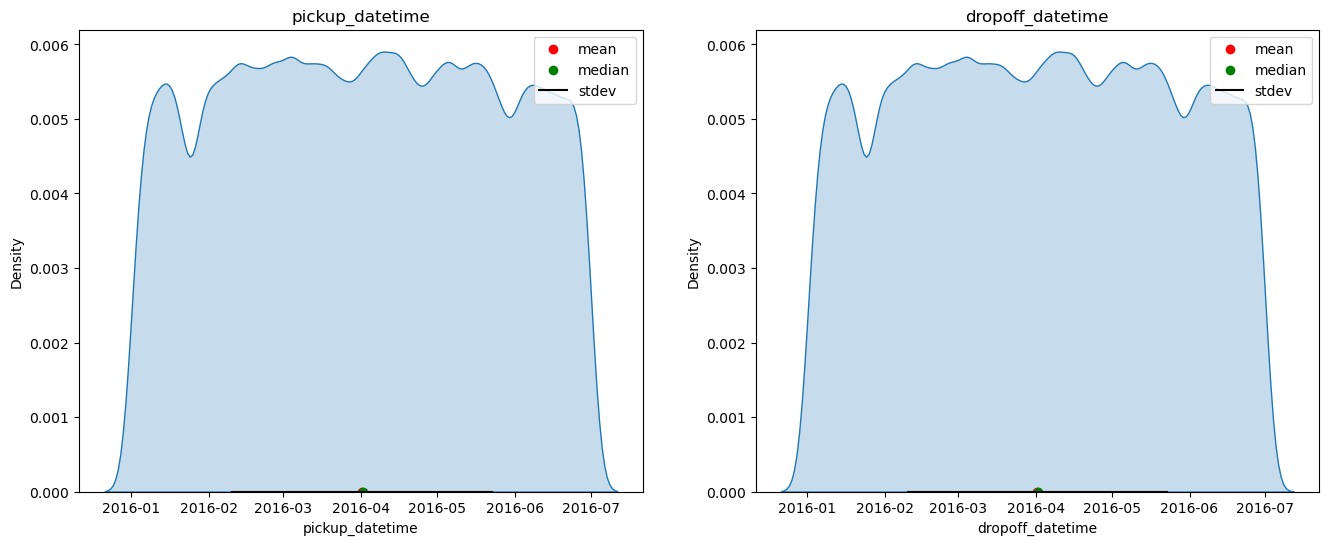

In [25]:
uva_datetime(data,numeric_datetime)

##### Pickup Datetime
Pickup datetime follows a uniform distribution 
Most pickups were made on 1-04-2016 at 5:30 PM
##### Dropoff Datetime
Dropoff datetime follows a uniform distribution 
Most dropoffs were made on 1-04-2016 at 5:47 PM


### Passenger

In [28]:
def uva_for_passenger(data,variable):
    plt.figure(figsize = (20,10))
    for j,i  in enumerate(variable):
        mini = data[i].min()
        maxi = data[i].max()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        points = mean-st_dev, mean+st_dev
        
        size = len(variable)
        plt.subplot(1,size,j+1)
        plt.title(i)
        sns.kdeplot(data[i],fill = True)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
        plt.scatter(x = mean,y = 0, color = 'red',label = 'mean')
        plt.scatter(x = median,y = 0, color = 'green',label = 'median')
        plt.legend()
        
     
        plt.title(' kurtosis = {};\nskew = {};\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),round(mean,2),round(median,2)))

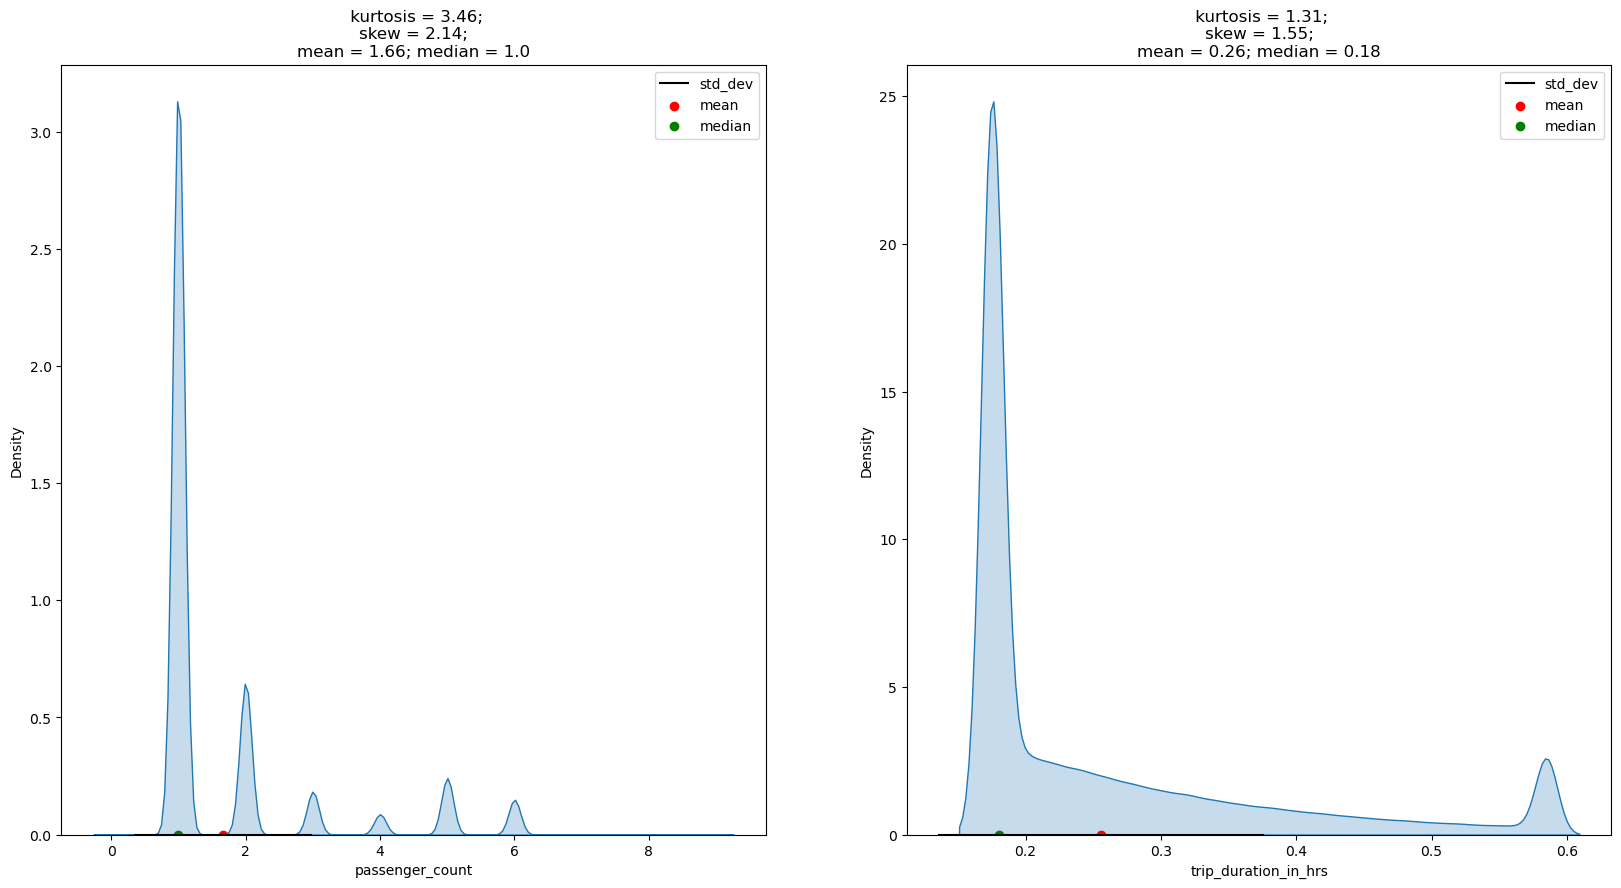

In [29]:
uva_for_passenger(data,numeric_passenger)

#### Passenger
The passenger count plot shows us that there was only 1 passenger for most number of trips.


#### Trip_duration_in_hrs

The Trip duration plot is positively skewed 
Kurtosis = 1.31 which means it is a leptokurtic distribution

Skewness = 1.55 which means it is a positively skewed distribution which means the mean and median is bigger than mode

### latitude and longitude

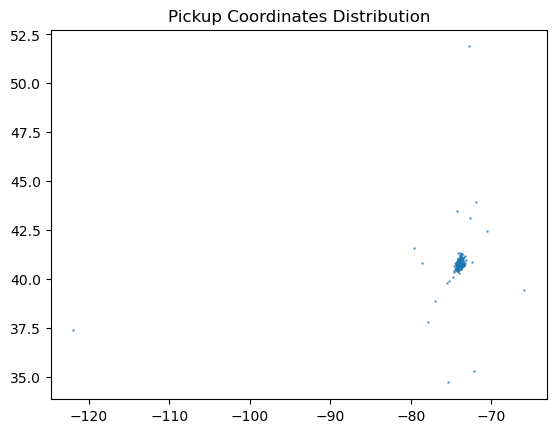

In [30]:
# Scatter plot for pickup coordinates
df = data
# Scatter plot for pickup coordinates
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], s=1, alpha=0.5)
plt.title('Pickup Coordinates Distribution')
plt.show()

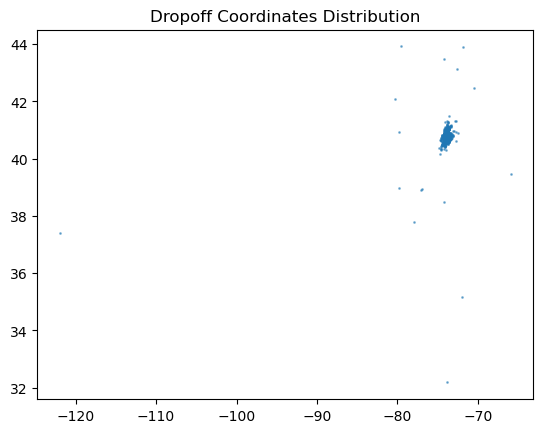

In [31]:
plt.scatter(data['dropoff_longitude'], data['dropoff_latitude'], s=1, alpha=0.5)
plt.title('Dropoff Coordinates Distribution')
plt.show()

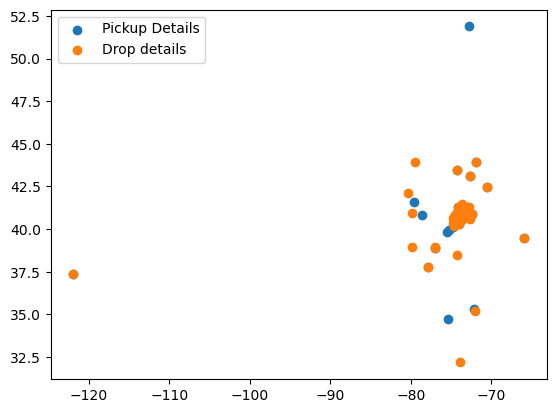

In [32]:
plt.scatter(x = data.pickup_longitude,y = data.pickup_latitude,label = 'Pickup Details');
plt.scatter(x = data.dropoff_longitude,y = data.dropoff_latitude,label = 'Drop details');
plt.legend()

### Univariate analysis - Categorical

Total number of trips  = 729322 ;
 Distribution =[390481 338841] 


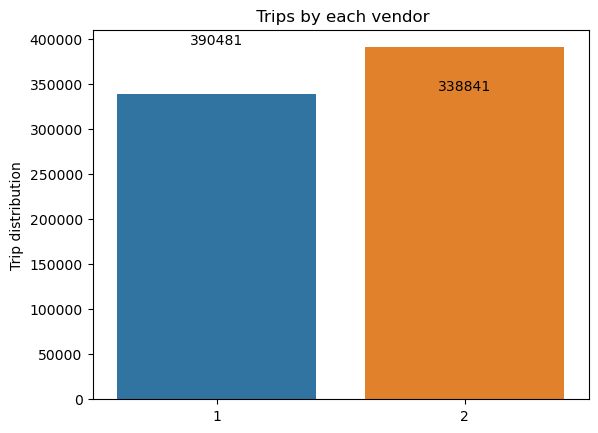

In [33]:
a = len(data.vendor_id)
b = data.vendor_id.value_counts().values
c = data.vendor_id.value_counts().values 
sns.barplot(x = data.vendor_id.value_counts().index,y = data.vendor_id.value_counts().values  )
plt.title(" Trips by each vendor")
plt.ylabel("Trip distribution")
print('Total number of trips  = {} ;\n Distribution ={} '.format(a,b))
for index, value in enumerate(c):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

####
Total number of trips are 729322

Vendor 2 has the highest number of trips

# Bivariate Analysis

#### List of hypothesis
1) Is the trip numbers more during peak hours ( 8:00 AM - 11 AM & 5AM - 7AM)

2) Is the trip duration more when there are more passengers 

3) Is the trip duration more on weekdays 

4) Is the trip duration more on weekends 

7) Is the trip durtaion more when it is an outstation trip 

6) Does vendor have anything to do with store_and_fwd_flag?


## Bivariate analysis Numerical _ Numerical 

In [34]:
numerical = data.select_dtypes(include = ['int','float'])

In [35]:
numerical.corr()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_in_hrs
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.014025
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.185132
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.169530
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.118134
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.152769
trip_duration,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.239320
trip_duration_in_hrs,0.014025,0.185132,-0.169530,0.118134,-0.152769,0.239320,1.000000


In [36]:
var = []
var.extend(numeric_passenger)
var.extend(numeric_lat_lon)

C:\Users\Sujay\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5283: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


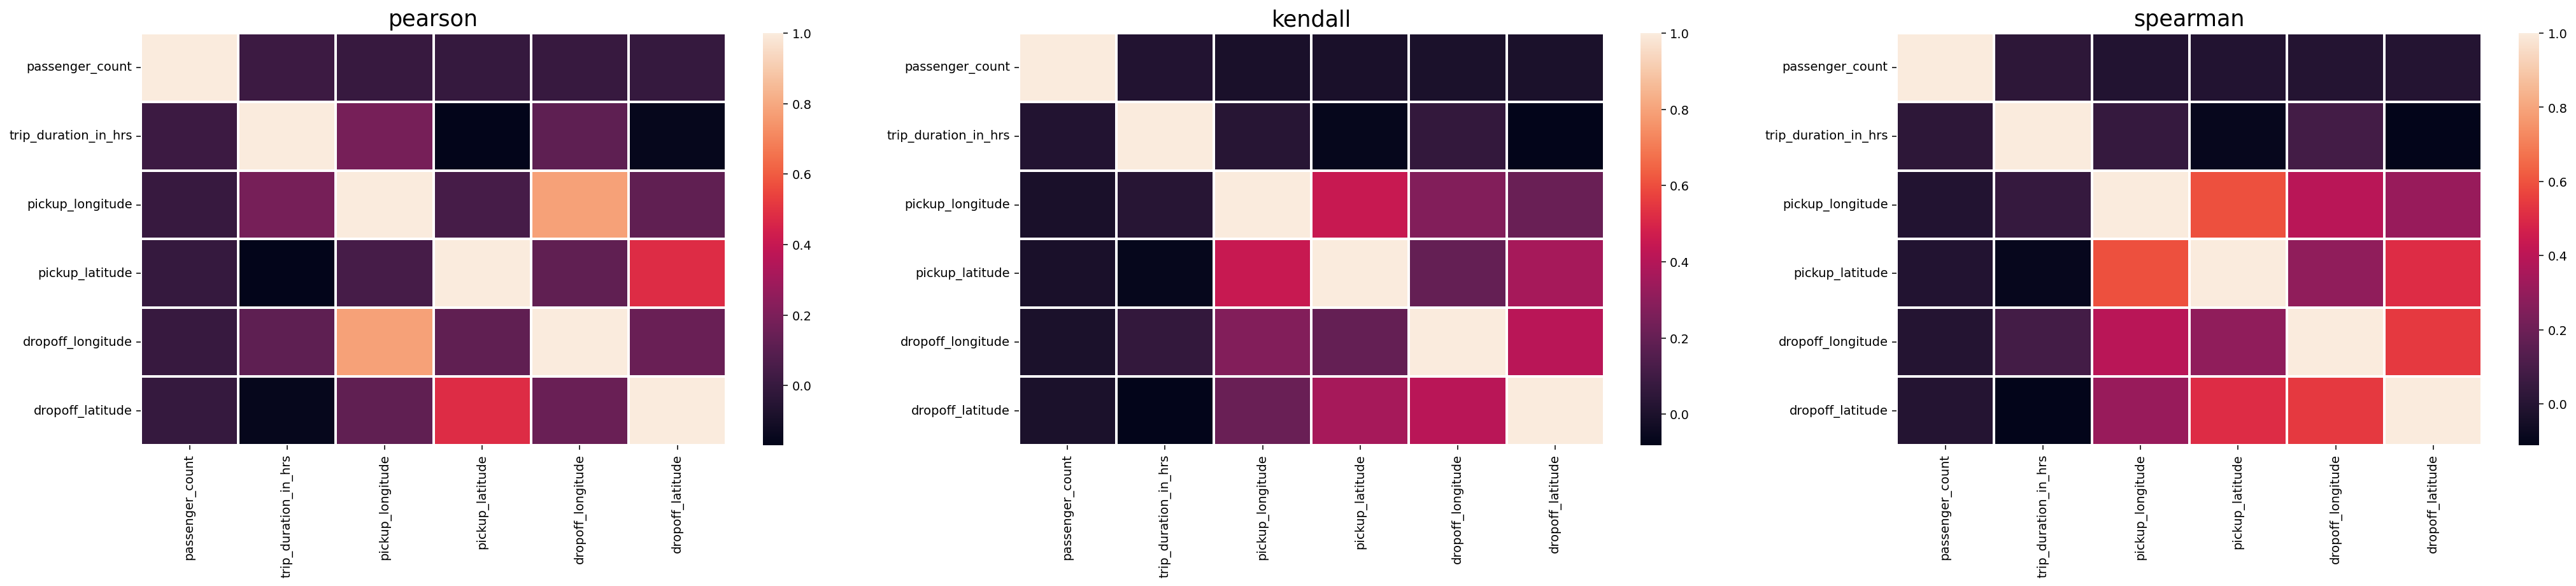

In [37]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [38]:
## There is high correlation between dropoff_longitude and pickup_longitude

### 1) Is the trip duration more during peak hours ( 8:00 AM - 11 AM & 5AM - 7AM)

In [39]:
data['hour_of_day'] = data.pickup_datetime.dt.hour

In [40]:
# Data during peak hours
peak= data[((data['hour_of_day'] >= 8) & (data['hour_of_day'] <= 11)) | ((data['hour_of_day'] >= 16) & (data['hour_of_day'] <= 19))]

# Data during non_peak hours
non_peak = data[~(((data['hour_of_day'] >= 8) & (data['hour_of_day'] <= 11)) | ((data['hour_of_day'] >= 16) & (data['hour_of_day'] <= 19)))]

In [41]:
# There is a slight increase in trip duration during peak hours
peak.trip_duration_in_hrs.mean().round(2),non_peak.trip_duration_in_hrs.mean().round(2)

(0.26, 0.25)

### 2) Is the trip duration more when there are more passengers 

In [42]:
less_passengers = data.loc[data.passenger_count<=2]
more_passengers = data.loc[data.passenger_count>2] 

In [43]:
# There is no change in trip duration with increase in passengers
less_passengers.trip_duration_in_hrs.mean().round(2),more_passengers.trip_duration_in_hrs.mean().round(2)

(0.26, 0.26)

### 3) Is the trip duration more on weekdays 

### 4) Is the trip duration more on weekends 

In [44]:
data['weekday'] = data['pickup_datetime'].dt.weekday
data.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_in_hrs,hour_of_day,weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.175,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.310,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.450,17,6


In [45]:
weekday = data.loc[(data.weekday == 0) | (data.weekday == 1) | (data.weekday == 2) | (data.weekday == 3) | (data.weekday == 4)]
weekend = data.loc[(data.weekday == 5) | (data.weekday == 6)]

### Summary
Pickup_longitude and dropoff_longitude have high correlation

Dropoff_longitude and pickup_longitude have high correlation

There is low correlation between trip duration and passenger count so the passenger count has no impact on trip duration

There is a slight increase in trip duration during peak hours

There is no change in trip duration with increase in passengers

There is slight change in trip duration between weekday and weekend trips

## Bivariate analysis Numerical _ categorical

### 5) Is the trip durtaion more when it is an outstation trip

In [46]:
from scipy.stats import t

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    ovr_sd = np.sqrt(sd1**2/n1 + sd2**2/n2)
    t_stat = (X1 - X2) / ovr_sd
    df = n1 + n2 - 2
    p_value = t.sf(np.abs(t_stat), df) * 2  
    return t_stat, p_value

In [47]:
from scipy.stats import ttest_ind

def Bivariate_cont_cat(data, cont, cat, category):
    # Creating 2 samples
    x1 = data[cont][data[cat] == category]
    x2 = data[cont][data[cat] != category]

    # Calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()

    # Calculating p-values
    t_stat, t_p_val = ttest_ind(x1, x2)

    # Table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc=np.mean)

    # Plotting
    plt.figure(figsize=(15, 6), dpi=140)

    # Barplot
    plt.subplot(1, 2, 1)
    sns.barplot(x=[str(category), 'not {}'.format(category)], y=[m1, m2])
    plt.ylabel('mean {}'.format(cont)) 
    plt.title('t-test p-value = {}\n{}'.format(t_p_val, table))

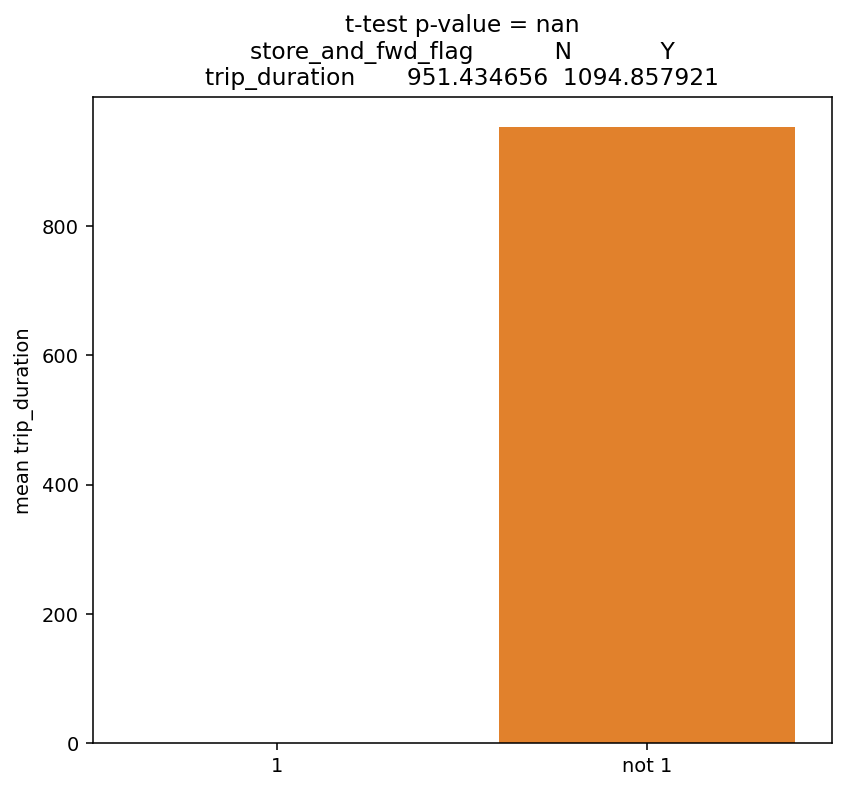

In [48]:
Bivariate_cont_cat(data, 'trip_duration', 'store_and_fwd_flag', 1)

In [49]:
# It shows that the trip duraton is higher when the taxi went offline which happens when the trip is an outstation trip
outstation = data.loc[data['store_and_fwd_flag'] == 'Y']
normal = data.loc[data['store_and_fwd_flag'] == 'N']

# There is slight change in trip duration between weekday and weekend trips
outstation.trip_duration_in_hrs.mean().round(2),normal.trip_duration_in_hrs.mean().round(2)

(0.3, 0.26)

### Summary 

1) There is slight change in trip duration between outstation and normal trips

## Bivariate analysis categorical - categorical

### 6) Does vendor have anything to do with store_and_fwd_flag?

In [50]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

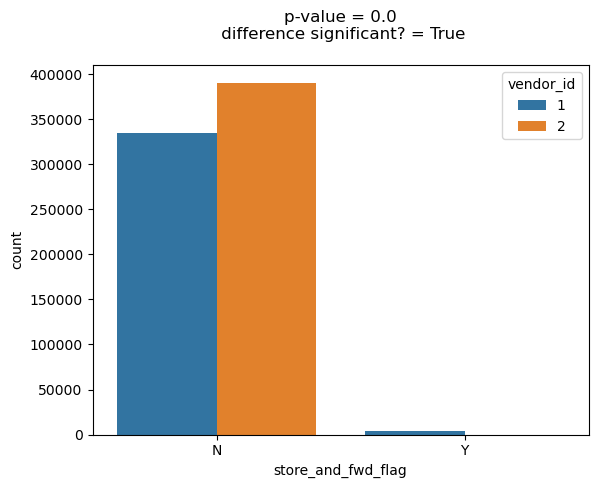

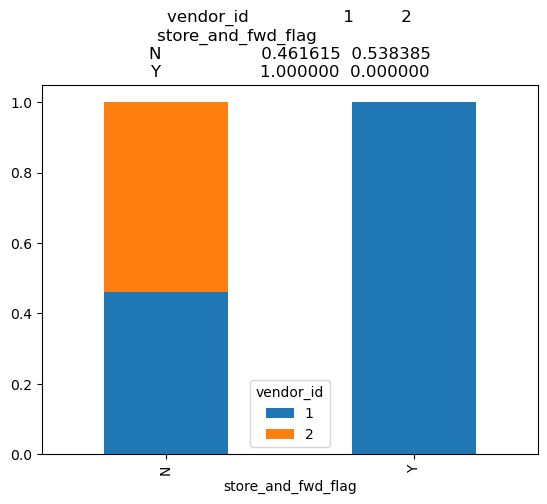

In [51]:
BVA_categorical_plot(data,'vendor_id', 'store_and_fwd_flag')

## Summary 

1) It is observed that there are very less store_and_fwd- flag values and only vendor 1 has this issue